**Data Exploration**

In [28]:
# imports
# Loading necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [29]:
# Load the original dataset
file_path = '/Users/lamine/Documents/CS Senior Design/Code/archive/metadata_compiled.csv'
metadata_df = pd.read_csv(file_path)

# Displaying basic information about the dataset
metadata_df.info()

# Path for the archive folder containing the audio files
archive_folder = '/Users/lamine/Documents/CS Senior Design/Code/archive/'

# Get the list of .webm files in the archive folder
webm_files_in_archive = [file for file in os.listdir(archive_folder) if file.endswith('.webm')]

# Extract the UUIDs from the webm files (removing .webm extension)
uuids_in_archive = set([file.replace('.webm', '') for file in webm_files_in_archive])

# Get the UUIDs from the metadata dataframe
uuids_in_metadata = set(metadata_df['uuid'])

# Step 1: Count the audio files in the folder that do not exist in the dataframe
extra_files_in_archive = uuids_in_archive - uuids_in_metadata
extra_files_count = len(extra_files_in_archive)

# Step 2: Find the UUIDs that exist in the dataframe but do not exist in the folder
missing_files_in_archive = uuids_in_metadata - uuids_in_archive
missing_files_count = len(missing_files_in_archive)

# Step 3: Remove the rows from the dataframe that have missing files in the archive
metadata_df_cleaned = metadata_df[~metadata_df['uuid'].isin(missing_files_in_archive)]

# Output the results
print(metadata_df.shape)
print(f"Number of extra files in the archive: {extra_files_count}")
print(f"Number of missing files in the archive: {missing_files_count}")
print(f"New cleaned dataset shape: {metadata_df_cleaned.shape}")

metadata_df = metadata_df_cleaned


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   27550 non-null  object 
 1   datetime               27550 non-null  object 
 2   cough_detected         27550 non-null  float64
 3   SNR                    27550 non-null  float64
 4   latitude               16084 non-null  float64
 5   longitude              16084 non-null  float64
 6   age                    15218 non-null  float64
 7   gender                 16224 non-null  object 
 8   respiratory_condition  16224 non-null  object 
 9   fever_muscle_pain      16224 non-null  object 
 10  status                 16224 non-null  object 
 11  quality_1              820 non-null    object 
 12  cough_type_1           802 non-null    object 
 13  dyspnea_1              820 non-null    object 
 14  wheezing_1             820 non-null    object 
 15  st

In [30]:
metadata_df.head()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rows with missing data

In [31]:
# Count the number of rows with missing data
rows_with_missing_data = metadata_df.isnull().any(axis=1).sum()

# Count the number of valid rows in the 'status' column
valid_status_rows = metadata_df['status'].notnull().sum()
total_rows = metadata_df.shape[0]

# Print the results
print(f"Number of rows with missing data: {rows_with_missing_data}")
print(f"Number of valid rows in 'status' column: {valid_status_rows} out of {total_rows}")


Number of rows with missing data: 25919
Number of valid rows in 'status' column: 15244 out of 25985


Bar diagram for all columns

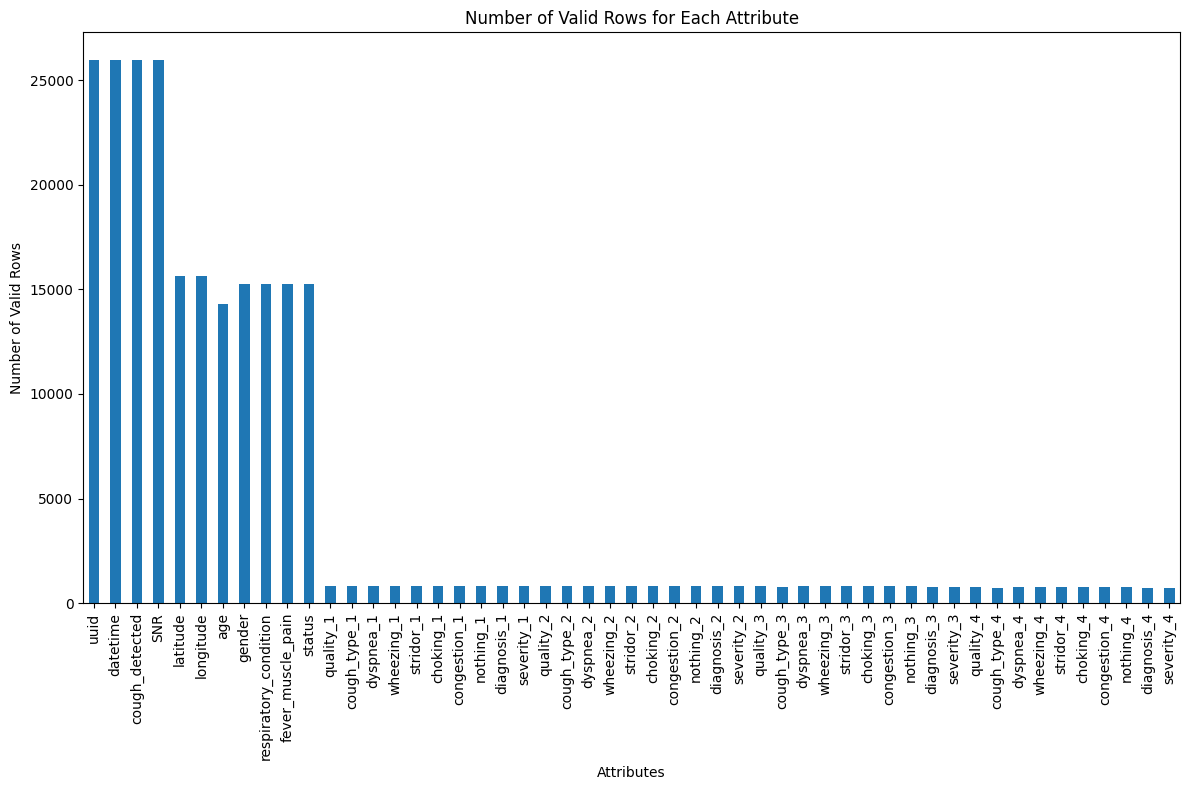

In [32]:
# Get the count of valid (non-null) rows for each column
valid_counts = metadata_df.notnull().sum()

# Plotting the bar diagram
plt.figure(figsize=(12, 8))
valid_counts.plot(kind='bar')
plt.title('Number of Valid Rows for Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Number of Valid Rows')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

Focus on "status" attribute that needs to be predicted

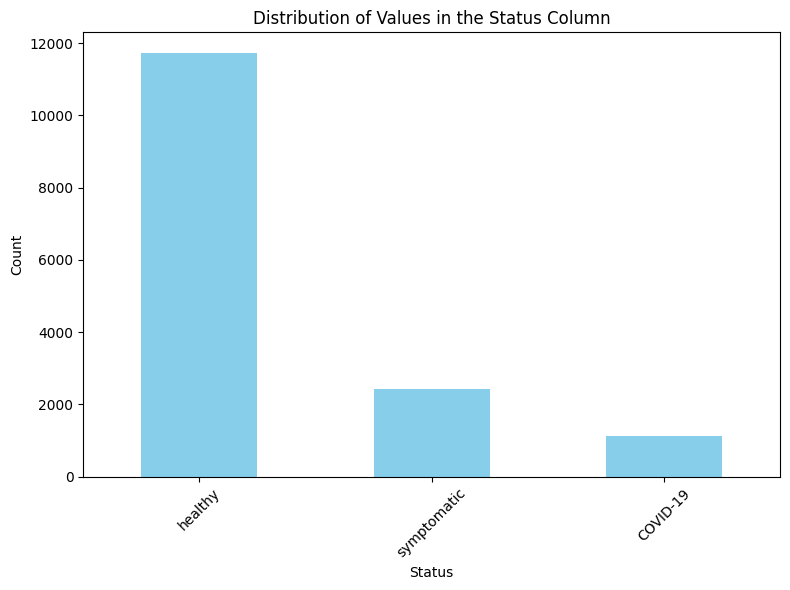

status
healthy        11715
symptomatic     2411
COVID-19        1118
Name: count, dtype: int64


In [33]:
# Count the distribution of values in the 'status' column
status_distribution = metadata_df['status'].value_counts()

# Plotting the bar diagram for 'status' column distribution
plt.figure(figsize=(8, 6))
status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Values in the Status Column')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# print the counts for status column
print(status_distribution)

Use undersampling to handle imbalanced dataset
- Select the best 1118 samples from both the "Healthy" and "Symptomatic" groups by prioritizing rows that have the most valid (non-null) data across all columns. This way data points are picked with the most complete information first, and if reaching 1155 high-quality points is not possible, randomly select the remaining ones.

In [44]:
# Step 1: Split the dataset into "Healthy", "Symptomatic", and "COVID-19" groups
healthy_df = metadata_df[metadata_df['status'] == 'healthy']
symptomatic_df = metadata_df[metadata_df['status'] == 'symptomatic']
covid_df = metadata_df[metadata_df['status'] == 'COVID-19']

# Step 2: Calculate the number of non-null values in each row for the "Healthy" and "Symptomatic" groups
healthy_df.loc[:, 'valid_columns_count'] = healthy_df.notnull().sum(axis=1)
symptomatic_df.loc[:, 'valid_columns_count'] = symptomatic_df.notnull().sum(axis=1)

# Step 3: Sort each group by the number of valid columns in descending order
healthy_sorted = healthy_df.sort_values(by='valid_columns_count', ascending=False)
symptomatic_sorted = symptomatic_df.sort_values(by='valid_columns_count', ascending=False)

# print(healthy_sorted.head(5))
# print(symptomatic_sorted.head(5))

# Step 4: Select the top 1118 from each group
healthy_top = healthy_sorted.head(1118)
symptomatic_top = symptomatic_sorted.head(1118)

print(healthy_top.shape)
print(symptomatic_top.shape)
# Step 5: If there are not enough high-quality samples, fill the rest with random samples
healthy_remaining = 1118 - len(healthy_top)
if healthy_remaining > 0:
    healthy_random = healthy_sorted.tail(healthy_remaining)
    healthy_top = pd.concat([healthy_top, healthy_random])
    print("adding to healthy")

symptomatic_remaining = 1118 - len(symptomatic_top)
if symptomatic_remaining > 0:
    symptomatic_random = symptomatic_sorted.tail(symptomatic_remaining)
    symptomatic_top = pd.concat([symptomatic_top, symptomatic_random])
    print("adding to symptomatic")

# Combine the selected "Healthy", "Symptomatic", and all "COVID-19" data
balanced_df = pd.concat([covid_df, healthy_top, symptomatic_top])

# Show the resulting balanced dataset size and info
balanced_df_info = balanced_df.info()
balanced_df_size = balanced_df.shape

balanced_df_size

(1118, 52)
(1118, 52)
<class 'pandas.core.frame.DataFrame'>
Index: 3354 entries, 7 to 3595
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   3354 non-null   object 
 1   datetime               3354 non-null   object 
 2   cough_detected         3354 non-null   float64
 3   SNR                    3354 non-null   float64
 4   latitude               2354 non-null   float64
 5   longitude              2354 non-null   float64
 6   age                    3099 non-null   float64
 7   gender                 3354 non-null   object 
 8   respiratory_condition  3354 non-null   object 
 9   fever_muscle_pain      3354 non-null   object 
 10  status                 3354 non-null   object 
 11  quality_1              697 non-null    object 
 12  cough_type_1           689 non-null    object 
 13  dyspnea_1              697 non-null    object 
 14  wheezing_1             697 non-null    

/var/folders/01/x_trt3n95_j48grf1z__n__m0000gn/T/ipykernel_8468/2757947007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_df.loc[:, 'valid_columns_count'] = healthy_df.notnull().sum(axis=1)
/var/folders/01/x_trt3n95_j48grf1z__n__m0000gn/T/ipykernel_8468/2757947007.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symptomatic_df.loc[:, 'valid_columns_count'] = symptomatic_df.notnull().sum(axis=1)


(3354, 52)

check if everything is good and display bar graph of balanced dataset

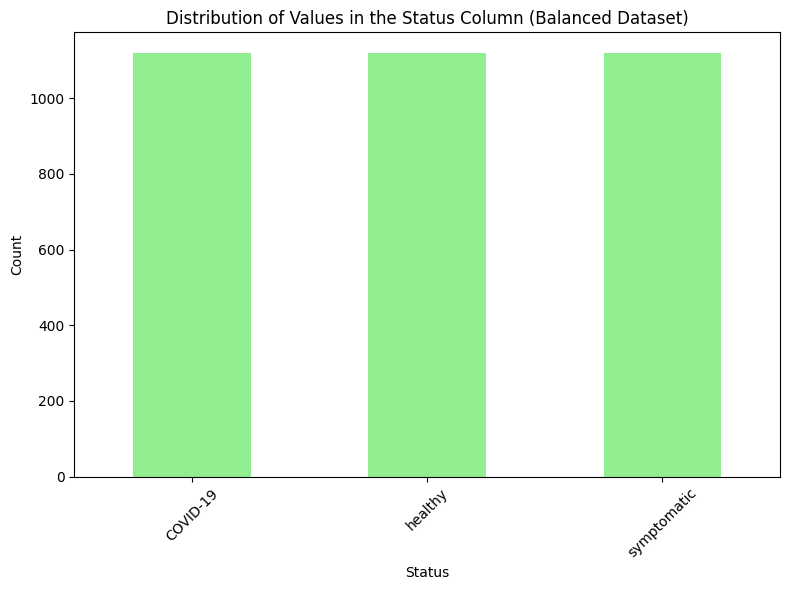

status
COVID-19       1118
healthy        1118
symptomatic    1118
Name: count, dtype: int64

In [45]:
# Step 1: Remove the 'valid_columns_count' column
balanced_df = balanced_df.drop(columns=['valid_columns_count'])

# Step 2: Ensure that all datapoints are distinct and unique
balanced_df = balanced_df.drop_duplicates()

# Step 3: Print the count for each value in the 'status' column again
new_status_distribution = balanced_df['status'].value_counts()

# Step 4: Plot the bar diagram for the new 'status' distribution
plt.figure(figsize=(8, 6))
new_status_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Values in the Status Column (Balanced Dataset)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Print the new status distribution
new_status_distribution


Now we have choosen the datapoints that we are going to use for data transformation

In [54]:
import os
import shutil

# Set the path for the current folder and the new "Balanced_Data" folder
current_folder = '/Users/lamine/Documents/CS Senior Design/Code'
new_folder = os.path.join(current_folder, 'Balanced_Data')
# Define the path for the "archive" folder where the .webm files are stored
archive_folder = os.path.join(current_folder, 'archive')


# Create the new folder if it doesn't exist
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# Get the list of UUIDs from the balanced dataset
uuids = balanced_df['uuid'].tolist()

# Loop through each UUID and copy the corresponding .webm file from the "archive" folder to the "Balanced_Data" folder
for uuid in uuids:
    file_name = f"{uuid}.webm"
    src_file = os.path.join(archive_folder, file_name)
    dest_file = os.path.join(new_folder, file_name)
    
    # Check if the file exists in the archive folder and copy it to the new folder
    if os.path.exists(src_file):
        shutil.copy(src_file, dest_file)

# Print a message to confirm completion
"Files corresponding to balanced dataset have been copied from 'archive' to 'Balanced_Data' folder."


"Files corresponding to balanced dataset have been copied from 'archive' to 'Balanced_Data' folder."

check if the new folder has all the required files

In [62]:
# List all files in the new "Balanced_Data" folder
files_in_balanced_data = os.listdir(new_folder)

# Ensure that only files corresponding to the balanced dataset UUIDs exist in the folder
files_in_balanced_data_set = set([file.replace('.webm', '') for file in files_in_balanced_data])
uuids_set = set(uuids)

# Check if the two sets match and if the file count is correct
if files_in_balanced_data_set == uuids_set and len(files_in_balanced_data) == len(uuids):
    result = "Correct"
else:
    result = "Mismatch"

print(result)

print(len(files_in_balanced_data_set))
print(len(uuids_set))


Correct
3354
3354


find which ones are missing and add them to the folder and then check again if both sets match

In [73]:
# # Find missing UUIDs by comparing the set of expected UUIDs with the files in the folder
# missing_uuids = uuids_set - files_in_balanced_data_set
# print(len(missing_uuids))

# # Copy the missing files from the "archive" folder to the "Balanced_Data" folder
# for uuid in missing_uuids:
#     file_name = f"{uuid}.webm"
#     src_file = os.path.join(archive_folder, file_name)
#     dest_file = os.path.join(new_folder, file_name)
    
#     # Check if the missing file exists in the archive folder and copy it
#     if os.path.exists(src_file):
#         shutil.copy(src_file, dest_file)

# # Verify if the new folder now contains the correct number of files and matches the UUIDs set
# files_in_balanced_data = os.listdir(new_folder)
# files_in_balanced_data_set = set([file.replace('.webm', '') for file in files_in_balanced_data])

# # Check if the two sets match and if the file count is correct
# if files_in_balanced_data_set == uuids_set and len(files_in_balanced_data) == len(uuids):
#     result = "Correct"
# else:
#     result = "Mismatch"

# result

# print(len(files_in_balanced_data_set))


check issue with missing files and print them

In [72]:
# # List and print the missing files that couldn't be copied
# missing_files = []

# for uuid in missing_uuids:
#     file_name = f"{uuid}.webm"
#     src_file = os.path.join(archive_folder, file_name)
    
#     # Check if the file exists in the archive, and if not, add it to the missing files list
#     if not os.path.exists(src_file):
#         missing_files.append(file_name)

# missing_files


Metadata is corrupted or incomplete (dataset as well)  
missing files do not exist in the archive folder, even though their UUIDs are present in the metadata dataset

find the number of covid 19 status datapoints from the balanced dataset that are in the new folder

In [71]:
# # Filter the balanced dataset for COVID-19 status
# covid_19_df = balanced_df[balanced_df['status'] == 'COVID-19']

# # Get the list of UUIDs for COVID-19 status from the balanced dataset
# covid_19_uuids = covid_19_df['uuid'].tolist()

# # Check how many of these files are in the "Balanced_Data" folder
# covid_19_files_in_folder = [uuid for uuid in covid_19_uuids if f"{uuid}.webm" in files_in_balanced_data]

# # Count the number of COVID-19 files in the folder
# len(covid_19_files_in_folder)

there was originally 1155 covid 19 status in the entire dataset now in the new folder there is only 1118, check if the missing ones that exist in the dataset do not exist in the folder

In [70]:
# # Find the COVID-19 UUIDs that are missing from the "Balanced_Data" folder
# covid_19_missing_in_folder = [uuid for uuid in covid_19_uuids if f"{uuid}.webm" not in files_in_balanced_data]

# # Get the count of missing files
# len(covid_19_missing_in_folder), covid_19_missing_in_folder


In [69]:
# # Count the number of files in the "archive" folder that end with ".webm"
# webm_files_in_archive = [file for file in os.listdir(archive_folder) if file.endswith('.webm')]
# webm_file_count = len(webm_files_in_archive)

# # Get the total number of rows in the metadata dataset
# total_metadata_count = metadata_df.shape[0]

# webm_file_count, total_metadata_count


--------

In [68]:
# # Load the original dataset
# file_path = '/Users/lamine/Documents/CS Senior Design/Code/archive/metadata_compiled.csv'
# metadata_df = pd.read_csv(file_path)

# # Path for the archive folder containing the audio files
# archive_folder = '/Users/lamine/Documents/CS Senior Design/Code/archive/'

# # Get the list of .webm files in the archive folder
# webm_files_in_archive = [file for file in os.listdir(archive_folder) if file.endswith('.webm')]

# # Extract the UUIDs from the webm files (removing .webm extension)
# uuids_in_archive = set([file.replace('.webm', '') for file in webm_files_in_archive])

# # Get the UUIDs from the metadata dataframe
# uuids_in_metadata = set(metadata_df['uuid'])

# # Step 1: Count the audio files in the folder that do not exist in the dataframe
# extra_files_in_archive = uuids_in_archive - uuids_in_metadata
# extra_files_count = len(extra_files_in_archive)

# # Step 2: Find the UUIDs that exist in the dataframe but do not exist in the folder
# missing_files_in_archive = uuids_in_metadata - uuids_in_archive
# missing_files_count = len(missing_files_in_archive)

# # Step 3: Remove the rows from the dataframe that have missing files in the archive
# metadata_df_cleaned = metadata_df[~metadata_df['uuid'].isin(missing_files_in_archive)]

# # Output the results
# print(metadata_df.shape)
# print(f"Number of extra files in the archive: {extra_files_count}")
# print(f"Number of missing files in the archive: {missing_files_count}")
# print(f"New cleaned dataset shape: {metadata_df_cleaned.shape}")


create a new CSV file containing only the data points that are present in the Balanced_Data folder and save it in the same folder.

In [75]:
# Path to the Balanced_Data folder
balanced_data_folder = '/Users/lamine/Documents/CS Senior Design/Code/Balanced_Data'

# Create a new dataframe with the items that are in the Balanced_Data folder
balanced_data_uuids = set([file.replace('.webm', '') for file in os.listdir(balanced_data_folder) if file.endswith('.webm')])
balanced_df_original = metadata_df[metadata_df['uuid'].isin(balanced_data_uuids)]

# Save the new dataframe as a CSV in the Balanced_Data folder
new_csv_path = os.path.join(balanced_data_folder, 'balanced_metadata.csv')
balanced_df_original.to_csv(new_csv_path, index=False)

print(f"New CSV saved at: {new_csv_path}")

New CSV saved at: /Users/lamine/Documents/CS Senior Design/Code/Balanced_Data/balanced_metadata.csv


Add the new column name with the format "audio-{number}-natural" for each row.  
Rename the corresponding .webm files in the Balanced_Data folder.  
Save the updated dataframe with the name column into a new CSV file.  

In [77]:
import os
import pandas as pd

# Load the balanced metadata CSV
file_path = '/Users/lamine/Documents/CS Senior Design/Code/Balanced_Data/balanced_metadata.csv'
balanced_df = pd.read_csv(file_path)

# Add a new column 'name' to the dataframe with the required format
balanced_df['name'] = [f"audio-{i+1}-natural" for i in range(len(balanced_df))]

# Path to the Balanced_Data folder
balanced_data_folder = '/Users/lamine/Documents/CS Senior Design/Code/Balanced_Data'

# Rename the files in the Balanced_Data folder to match the new names
for i, row in balanced_df.iterrows():
    old_name = f"{row['uuid']}.webm"
    new_name = f"{row['name']}.webm"
    old_file_path = os.path.join(balanced_data_folder, old_name)
    new_file_path = os.path.join(balanced_data_folder, new_name)
    
    # Rename the file if it exists
    if os.path.exists(old_file_path):
        os.rename(old_file_path, new_file_path)

# Save the updated dataframe with the 'name' column to a new CSV
new_csv_path = os.path.join(balanced_data_folder, 'balanced_metadata_with_names.csv')
balanced_df.to_csv(new_csv_path, index=False)

print(f"New CSV with names saved at: {new_csv_path}")


New CSV with names saved at: /Users/lamine/Documents/CS Senior Design/Code/Balanced_Data/balanced_metadata_with_names.csv


### Will need to go back and listen to arround 3500 audios to make sure they are adequate for the task because this dataset needs a lot of work and some audios should be removed